# Introdução ao Pandas DataFrame

O **DataFrame** é considerado por muitos como o principal objeto do módulo Pandas. Ele pode ser visto como uma matriz com linhas e colunas rotuladas ou simplesmente como um conjunto de Series. Cada coluna de um DataFrame pode ser retornado como uma Series.

Para mais informações sobre o objeto **DataFrame** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

O código fonte do objeto DataFrame está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/frame.py).

In [1]:
# Importando os módulos
import numpy as np
import pandas as pd

In [3]:
linhas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colunas = ["A", "B", "C", "D", "E"]
np.random.seed(1)
dados = np.random.randint(0,100,(10,5))
df = pd.DataFrame(dados, linhas, colunas)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int32
 1   B       10 non-null     int32
 2   C       10 non-null     int32
 3   D       10 non-null     int32
 4   E       10 non-null     int32
dtypes: int32(5)
memory usage: 280.0 bytes


In [5]:
# Medidas estatísticas do DataFrame
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.800000,45.500000,45.100000,45.300000,45.000000
std,28.785799,37.880661,36.354581,27.912761,31.742016
min,5.000000,1.000000,0.000000,9.000000,1.000000
25%,11.750000,12.500000,7.750000,18.250000,21.250000
50%,29.500000,44.500000,56.500000,53.500000,39.000000
75%,52.000000,77.000000,70.000000,66.250000,74.250000
max,87.000000,94.000000,96.000000,86.000000,87.000000


<AxesSubplot:>

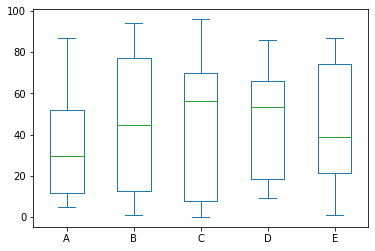

In [6]:
# Plotagem de gráficos
%matplotlib inline
df.plot.box()

<AxesSubplot:>

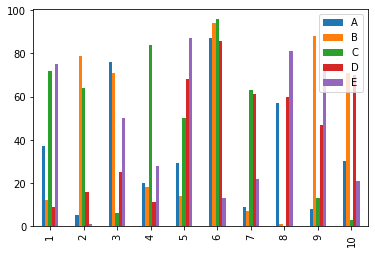

In [7]:
df.plot.bar()

In [8]:
# Selecionar uma coluna
df["A"]

1     37
2      5
3     76
4     20
5     29
6     87
7      9
8     57
9      8
10    30
Name: A, dtype: int32

In [10]:
df["B"]

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [11]:
type(df["B"])

pandas.core.series.Series

In [12]:
# Selecionando múltiplas colunas
df[["C", "D", "E"]]

,C,D,E
1,72,9,75
2,64,16,1
3,6,25,50
4,84,11,28
5,50,68,87
6,96,86,13
7,63,61,22
8,0,60,81
9,13,47,72
10,3,70,21


In [13]:
# Notação alternativa para seleção de colunas através do ponto (.)
df.B

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [6]:
# Inclusão de colunas
df["Total"] = df.A + df.B + df.C + df.D + df.E
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [7]:
# Somatório de cada coluna
df.sum()


A         358
B         455
C         451
D         453
E         450
Total    2167
dtype: int64

In [17]:
type(df.sum())

pandas.core.series.Series

In [8]:
# Média aritmética de cada coluna
df.mean()

A         35.8
B         45.5
C         45.1
D         45.3
E         45.0
Total    216.7
dtype: float64

In [9]:
# Adicionando um nova linha com o somatório
tot_coluna = pd.DataFrame(np.array(df.sum()).reshape(1,6), index=['Total'], columns=df.columns)
tot_coluna

,A,B,C,D,E,Total
Total,358,455,451,453,450,2167


In [10]:
# Concatenando o DataFrame tot_coluna com o DataFrame df
df2 = df.append(tot_coluna)
df2

C:\Users\Thiago\AppData\Local\Temp\ipykernel_20344\1900887922.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(tot_coluna)


,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [12]:
# Outra forma de inserir uma nova linha seria ignorar os rótulos (índices) das linhas
df3 = df2.append(df.mean(), ignore_index = True)
df3

C:\Users\Thiago\AppData\Local\Temp\ipykernel_20344\3592129561.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(df.mean(), ignore_index = True)


,A,B,C,D,E,Total
0,37.0,12.0,72.0,9.0,75.0,205.0
1,5.0,79.0,64.0,16.0,1.0,165.0
2,76.0,71.0,6.0,25.0,50.0,228.0
3,20.0,18.0,84.0,11.0,28.0,161.0
4,29.0,14.0,50.0,68.0,87.0,248.0
5,87.0,94.0,96.0,86.0,13.0,376.0
6,9.0,7.0,63.0,61.0,22.0,162.0
7,57.0,1.0,0.0,60.0,81.0,199.0
8,8.0,88.0,13.0,47.0,72.0,228.0
9,30.0,71.0,3.0,70.0,21.0,195.0


In [13]:
# Exclusão de colunas usando o drop
df4 = df.drop("Total", axis=1) # axis = 1, excluir a coluna
df4

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [14]:
# df mantém a coluna "Total"
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [15]:
# Para excluir a coluna "Total" de df, é necessário usar o parâmetro inplace
df.drop("Total", axis = 1, inplace=True) # ou df = df.drop("Total", axis=1)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [17]:
# Exclusão de uma linha específica
df2.drop(9, inplace=True) # axis por padrão é 0 (eixo das linhas)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
Total,358,455,451,453,450,2167


In [18]:
# Exclusão de múltiplas linhas
df2.drop([2, 7, 8], inplace=True)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
Total,358,455,451,453,450,2167


In [20]:
# Seleção de linhas
# Pelo rótulo da linha
df.loc[[1, 6]]

,A,B,C,D,E
1,37,12,72,9,75
6,87,94,96,86,13


In [21]:
# Seleção de linhas e colunas através dos rótulos
df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [22]:
# Seleção de linhas
# Pelo índice da linha
df.iloc[[0, 4, 5]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [24]:
df.iloc[[0, 4, 5], [3,4]] # equivalente a df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [25]:
df.iloc[9:6:-1, 1:4] # usando notação do numpy - Linhas 9 a 7 (invertida), colunas 1 a 3

,B,C,D
10,71,3,70
9,88,13,47
8,1,0,60


### Exercitando

In [38]:
# Crie o DataFrame dfex com 12 linhas e 6 colunas conforme a saída abaixo
dfex = pd.DataFrame(np.array(range(1,73)).reshape(12,6), list(range(1,13)), "A B C D E F ".split())
dfex

,A,B,C,D,E,F
1,1,2,3,4,5,6
2,7,8,9,10,11,12
3,13,14,15,16,17,18
4,19,20,21,22,23,24
5,25,26,27,28,29,30
6,31,32,33,34,35,36
7,37,38,39,40,41,42
8,43,44,45,46,47,48
9,49,50,51,52,53,54
10,55,56,57,58,59,60


In [59]:
# Crie a coluna SubTotal1 que será a soma das colunas A, C e E

dfex["SubTotal1"] = dfex.A + dfex.C + dfex.E
dfex

,A,B,C,D,E,F,Total,SubTotal2,SubTotal1
0,1,2,3,4,5,6,20,12,9
1,7,8,9,10,11,12,56,30,27
2,13,14,15,16,17,18,92,48,45
3,19,20,21,22,23,24,128,66,63
4,25,26,27,28,29,30,164,84,81
5,31,32,33,34,35,36,200,102,99
6,37,38,39,40,41,42,236,120,117
7,43,44,45,46,47,48,272,138,135
8,49,50,51,52,53,54,308,156,153
9,55,56,57,58,59,60,344,174,171


In [58]:
# Crie a coluna SubTotal2 que será a soma das colunas B, D e F
dfex["SubTotal2"] = dfex.B + dfex.D + dfex.F
dfex

,A,B,C,D,E,F,Total,SubTotal2
0,1,2,3,4,5,6,20,12
1,7,8,9,10,11,12,56,30
2,13,14,15,16,17,18,92,48
3,19,20,21,22,23,24,128,66
4,25,26,27,28,29,30,164,84
5,31,32,33,34,35,36,200,102
6,37,38,39,40,41,42,236,120
7,43,44,45,46,47,48,272,138
8,49,50,51,52,53,54,308,156
9,55,56,57,58,59,60,344,174


In [60]:
# Crie a coluna Total que será a soma das colunas A, B, C, D, E e F (ou Subtotal1 + Subtotal2)
dfex["Total"] = dfex.SubTotal1 + dfex.SubTotal2
dfex

,A,B,C,D,E,F,Total,SubTotal2,SubTotal1
0,1,2,3,4,5,6,21,12,9
1,7,8,9,10,11,12,57,30,27
2,13,14,15,16,17,18,93,48,45
3,19,20,21,22,23,24,129,66,63
4,25,26,27,28,29,30,165,84,81
5,31,32,33,34,35,36,201,102,99
6,37,38,39,40,41,42,237,120,117
7,43,44,45,46,47,48,273,138,135
8,49,50,51,52,53,54,309,156,153
9,55,56,57,58,59,60,345,174,171


In [61]:
# Crie um novo DataFrame dfex2 contendo apenas as colunas Subtotal1 e Subtotal2
dfex2 = dfex[['SubTotal1', 'SubTotal2']]
dfex2

,SubTotal1,SubTotal2
0,9,12
1,27,30
2,45,48
3,63,66
4,81,84
5,99,102
6,117,120
7,135,138
8,153,156
9,171,174


In [62]:
# Exclua as colunas Subtotal1 e Subtotal2 do DataFrame dfex
dfex.drop(['SubTotal1', 'SubTotal2'],axis = 1, inplace = True)

In [63]:
dfex

,A,B,C,D,E,F,Total
0,1,2,3,4,5,6,21
1,7,8,9,10,11,12,57
2,13,14,15,16,17,18,93
3,19,20,21,22,23,24,129
4,25,26,27,28,29,30,165
5,31,32,33,34,35,36,201
6,37,38,39,40,41,42,237
7,43,44,45,46,47,48,273
8,49,50,51,52,53,54,309
9,55,56,57,58,59,60,345


In [64]:
# Crie o DataFrame dfex3 contendo as 4 últimas linhas e as 3 primeiras colunas de dfex
dfex3 = dfex.iloc[-4:, 0:3]
dfex3

,A,B,C
9,55,56,57
10,61,62,63
11,67,68,69
12,408,420,432


In [65]:
# Insira em dfex as linhas com a soma de cada coluna
dfex = dfex.append(dfex.sum(), ignore_index = True)
dfex

C:\Users\Thiago\AppData\Local\Temp\ipykernel_20344\4288980624.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfex = dfex.append(dfex.sum(), ignore_index = True)


,A,B,C,D,E,F,Total
0,1,2,3,4,5,6,21
1,7,8,9,10,11,12,57
2,13,14,15,16,17,18,93
3,19,20,21,22,23,24,129
4,25,26,27,28,29,30,165
5,31,32,33,34,35,36,201
6,37,38,39,40,41,42,237
7,43,44,45,46,47,48,273
8,49,50,51,52,53,54,309
9,55,56,57,58,59,60,345


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Thiago\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Thiago\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Foi forçado o cancelamento de uma